In [0]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Central limit theorem

Beta distribution ([Wikipedia](https://en.wikipedia.org/wiki/Beta_distribution))

## Generate sample from beta distribution

In [0]:
alpha = 0.5
beta = 0.5
# Define random variable
beta_rv = sts.beta(a=alpha, b=beta)

# Generte 1000 values
beta_rvs = beta_rv.rvs(size = 1000)

## Draw histogram of sample

Text(0, 0.5, 'Value of probability density')

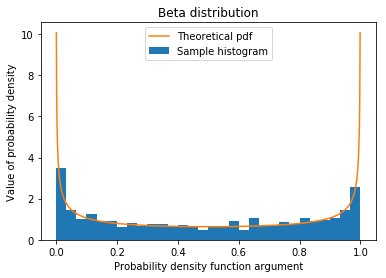

In [5]:
# Draw histogram of sample
plt.hist(beta_rvs, bins=30, density=True, label = 'Sample histogram')

# Draw probability density function (pdf)
x = np.linspace(0,1,1000)
plt.plot(x, beta_rv.pdf(x), label='Theoretical pdf')

# Draw title, legend and axis labels
plt.title('Beta distribution')
plt.legend()
plt.xlabel('Probability density function argument')
plt.ylabel('Value of probability density')

## Estimate the distribution of the sample mean of your random variable for different sample sizes

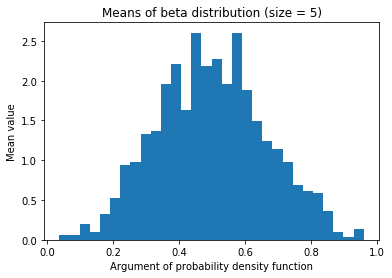

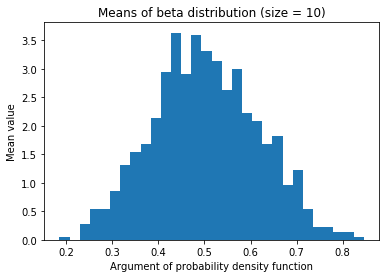

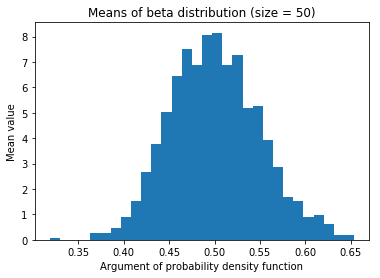

In [7]:
# Number of samples
nSamples = 1000

# Sample sizes
sampleSizes = [5, 10, 50]

# Array to store samples
samples = np.zeros((len(sampleSizes), nSamples))

# Generate means for samples with different sizes
for sampleIndex in range(nSamples):
  for sampleSizeIndex, sampleSize in enumerate(sampleSizes):
    sample = np.array(sts.beta(a=alpha, b=beta).rvs(size=sampleSize))
    samples[sampleSizeIndex, sampleIndex] = sample.mean()

# Draw histograms
for sampleSizeIndex, sampleSize in enumerate(sampleSizes):
  plt.hist(samples[sampleSizeIndex], bins=30, density=True)
  plt.title('Means of beta distribution (size = ' + str(sampleSize) + ')')
  plt.xlabel('Argument of probability density function')
  plt.ylabel('Mean value')
  plt.show()

## Calculate values of normal distributions parameters that according to Central limit theorem approximates distribution of sample means

In [11]:
mean = alpha / (alpha + beta)

variances = np.zeros(len(sampleSizes))
for sampleSizeIndex, sampleSize in enumerate(sampleSizes):
  variances[sampleSizeIndex] = ( (alpha * beta) / (((alpha + beta) ** 2) * (alpha + beta + 1)) ) / sampleSize 

print("Mean:", mean)
for i, v in enumerate(variances):
  print("Variance, n = " + str(sampleSizes[i]) + ":", v)

Mean: 0.5
Variance, n = 5: 0.025
Variance, n = 10: 0.0125
Variance, n = 50: 0.0025


## Draw histograms with density of the normal distribution

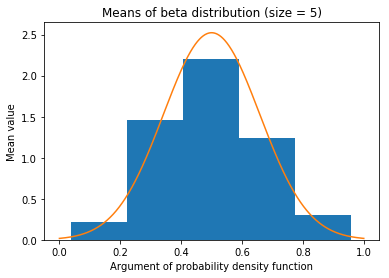

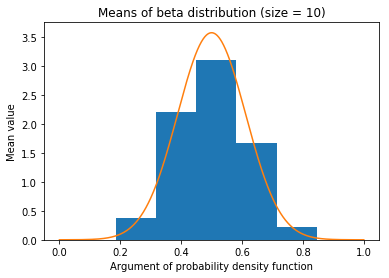

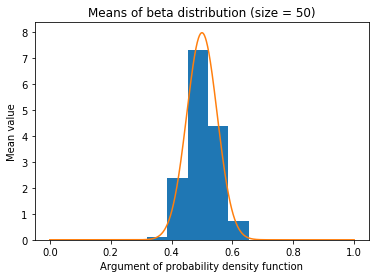

In [12]:
# Draw histograms
for sampleSizeIndex, sampleSize in enumerate(sampleSizes):
  plt.hist(samples[sampleSizeIndex], bins=5, density=True, label='Means of beta distribution')

  # Normal distribution
  mu = mean
  sigma = math.sqrt(variances[sampleSizeIndex])
  norm_rv = sts.norm(loc=mu, scale=sigma)
  x = np.linspace(0,1,1000)
  pdf = norm_rv.pdf(x)
  plt.plot(x, pdf, label='Normal distribution')

  # Show
  plt.title('Means of beta distribution (size = ' + str(sampleSize) + ')')
  plt.xlabel('Argument of probability density function')
  plt.ylabel('Mean value')
  plt.show()

## Results

Accuracy of approximation increases with size of sample. Central limit theorem works